# Topological Turing and Dirac Pattern Formation

This notebook demonstrates a Topological Turing Pattern formation. Turing patterns arise in systems where two or more substances interact and diffuse in a way that leads to stable, non-uniform concentrations. These patterns are often used to model biological processes, such as animal coat markings. Here species are topological signal that live on nodes and edges.Since the node and edge signals are one dimensional the Topological Turing patterns are static.

In this simulation, we will use a configuration file to set up the parameters for the Topological Turing Pattern. We also import necessary libraries: `numpy` for numerical operations and `scipy.integrate.solve_ivp` for solving differential equations.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from functions_turing import *
from plotting_functions_turing import plot_aggregated_results, calculate_and_plot_dispersion


If latex is not installed uncomment and run the cell below:

In [12]:
# !apt-get install texlive texlive-xetex texlive-latex-extra pandoc cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
The following additional packages will be installed:
  ghostscript
Suggested packages:
  ghostscript-x
The following NEW packages will be installed:
  dvipng ghostscript
0 upgraded, 2 newly installed, 0 to remove and 9 not upgraded.
Need to get 128 kB of archives.
After this operation, 414 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 ghostscript amd64 9.55.0~dfsg1-0ubuntu5.5 [49.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dvipng amd64 1.15-1.1 [78.9 kB]
Fetched 128 kB in 0s (592 kB/s)
Selecting previously unselected p

## Configuration File

The configuration file sets the parameters for the simulation. We use 'Giambagli_etal_PRE.yaml' for this example, which is designed to reproduce the results from the paper “Diffusion-driven instability of topological signals coupled by the Dirac operator”.

In [2]:
configuration_name = 'Giambagli_etal_PRE.yaml'
config = LoadConfig(configuration_name)

## Loading Matrices

The matrices 'adjacency' and 'boundary' are loaded from 'Matrices_benchmark.npz'. These matrices are crucial for the simulation as they define the relationships and boundaries within the system.

In [3]:
A, B = import_matrices('Matrices_benchmark.npz')['adjacency'], import_matrices('Matrices_benchmark.npz')['boundary']
nodes, links = B.shape

## Hodge Laplacian Calculation

The Hodge Laplacian is a critical component in our simulation, representing the diffusion properties of the system. It's calculated using the adjacency and boundary matrices.

In [4]:
deg = np.sum(A, axis=1)
L0 = np.diag(deg) - A
L1 = B.T @ B

## Dispersion Relation

The dispersion relation is calculated and plotted. This step is crucial for understanding the stability and dynamics of the patterns that will emerge.

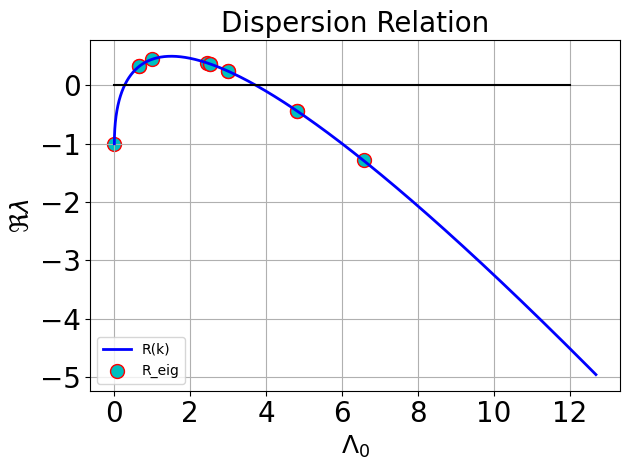

In [5]:
calculate_and_plot_dispersion(L0, config)

## Numerical Integration

The system of differential equations representing the Turing pattern dynamics is solved numerically over a specified time range. This step calculates how the pattern evolves over time.

In [6]:
t_ini, t_final, y0 = initial_condition(nodes, links, config)
sol = solve_ivp(system_to_integrate, [t_ini, t_final], y0, method='RK45', args=(config, B, L0, L1))

## Plotting the Results

Finally, we plot the aggregated results to visualize the Turing patterns that have evolved over time.

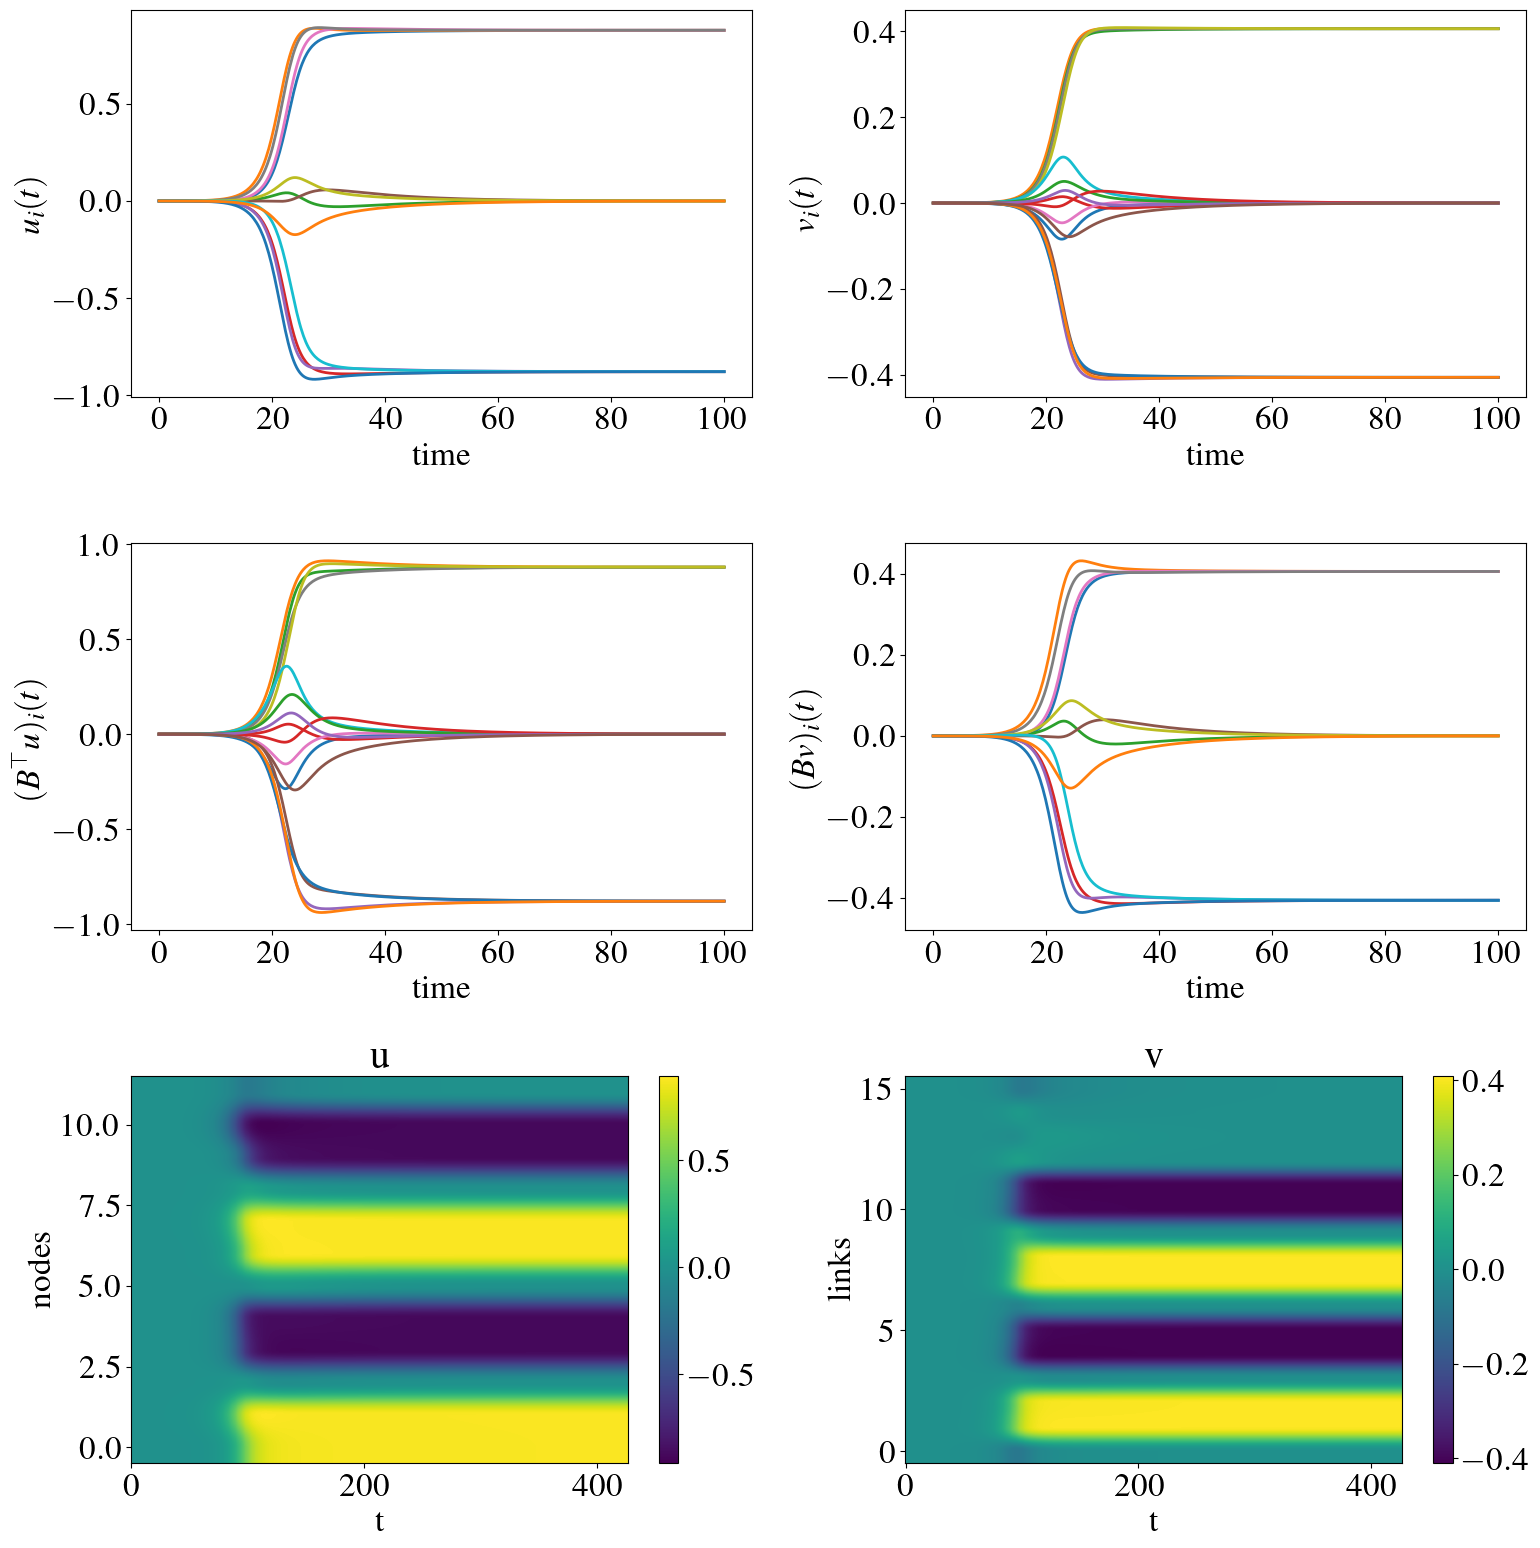

In [13]:
plot_aggregated_results(sol, B)